# Data cleaning and preprocessing

In [9]:
import pandas as pd
import numpy as np

def clean_campaign_data(df):
    """
    Cleans the Campaign-Data.csv DataFrame by:
      - Normalizing column names
      - Stripping commas/dashes from numeric fields
      - Parsing dates
      - Creating a binary ‘Visit’ outcome
    """
    df_clean = df.copy()

    # 1) Normalize column names
    df_clean.columns = (
        df_clean.columns
        .str.strip()
        .str.replace(" ", "_", regex=False)
        .str.replace("(", "", regex=False)
        .str.replace(")", "", regex=False)
    )

    # 2) Numeric cleanup: remove commas, convert '-' to NaN
    cols_to_clean = [
        'Amount_Collected','Unit Sold','Campaign (Email)', 'Campaign_Flyer','Campaign (Phone)','Facebook',
          'Instagram', 'YouTube', 'TikTok'
          ]
    for col in cols_to_clean:
        if col in df_clean.columns:
            df_clean[col] = (
                df_clean[col]
                .astype(str)
                .str.replace(",", "", regex=False)
                .str.strip()
                .replace("-", np.nan)
                .astype(float)
            )

    # 3) Parse the date
    df_clean['Calendardate'] = pd.to_datetime(df_clean['Calendardate'], format='%d-%m-%Y')

    # 4) Create binary outcome
    df_clean['Visit'] = (df_clean['Unit_Sold'] > 0).astype(int)

    return df_clean

# —————— USAGE ——————
# Point this to where your file actually lives:
path = r"C:\Users\w0800598\Documents\Data-Science-Projects\MMM\Data\Campaign-Data.csv"
df = pd.read_csv(path)

# Clean it
df_cleaned = clean_campaign_data(df)

# Quick sanity check
print(df_cleaned.dtypes)
print(df_cleaned.head())


Client_ID                        object
Client_Type                      object
Number_of_Customers               int64
Monthly_Target                    int64
Zip_Code                          int64
Calendardate             datetime64[ns]
Amount_Collected                float64
Unit_Sold                         int64
Campaign_Email                    int64
Campaign_Flyer                  float64
Campaign_Phone                    int64
Facebook                        float64
Instagram                       float64
YouTube                         float64
TikTok                          float64
LinkedIn                          int64
Number_of_Competition            object
Visit                             int32
dtype: object
   Client_ID      Client_Type  Number_of_Customers  Monthly_Target  Zip_Code  \
0  ID-987275  Medium Facility                 2800             125      1003   
1  ID-987275  Medium Facility                 2800             125      1003   
2  ID-987275  Medium Facil

In [10]:
df_cleaned.head()

,Client_ID,Client_Type,Number_of_Customers,Monthly_Target,Zip_Code,Calendardate,Amount_Collected,Unit_Sold,Campaign_Email,Campaign_Flyer,Campaign_Phone,Facebook,Instagram,YouTube,TikTok,LinkedIn,Number_of_Competition,Visit
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,NaN,0,0,0.0,0,0.0,0.0,0.0,0.0,0,Low,0
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460.0,24,0,0.0,0,0.0,0.0,0.0,0.0,322500,Low,1
2,ID-987275,Medium Facility,2800,125,1003,2014-03-18,10228384.0,75,0,0.0,0,0.0,0.0,0.0,0.0,0,Low,1
3,ID-987275,Medium Facility,2800,125,1003,2014-04-18,17047304.0,123,0,0.0,0,0.0,3547500.0,1290000.0,0.0,0,Low,1
4,ID-987275,Medium Facility,2800,125,1003,2014-05-19,23866224.0,171,0,0.0,0,0.0,0.0,0.0,0.0,0,Low,1


# Feature Engineering

In [11]:
## Creation of Additional Features
df_cleaned['Calendardate']=pd.to_datetime(df_cleaned['Calendardate'])
df_cleaned['Calendar_Month']=df_cleaned['Calendardate'].dt.month
df_cleaned['Calendar_Year']=df_cleaned['Calendardate'].dt.year

# Correlation Analysis

In [14]:
# Select only numeric features for correlation calculation
numeric_data = df_cleaned.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

correlation_with_amount_collected = correlation_matrix[['Amount_Collected']]

# Print or display the results
print(correlation_with_amount_collected)


                     Amount_Collected
Number_of_Customers          0.535321
Monthly_Target               0.523661
Zip_Code                          NaN
Amount_Collected             1.000000
Unit_Sold                    0.996489
Campaign_Email               0.217570
Campaign_Flyer               0.370987
Campaign_Phone              -0.002421
Facebook                     0.265893
Instagram                    0.474523
YouTube                      0.231210
TikTok                       0.218170
LinkedIn                     0.060565
Visit                        0.095042
Calendar_Month               0.079363
Calendar_Year                0.240905


In [15]:
import seaborn as sns
import pandas as pd

# Set color map
cm = sns.light_palette("green", as_cmap=True)

# Compute correlation with 'Amount_Collected'
correlation_analysis = pd.DataFrame(
    df_cleaned[['Amount_Collected',
          'Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone',
          'Facebook', 'Instagram', 'YouTube', 'TikTok', 'LinkedIn']].corr()['Amount_Collected']
).reset_index()

# Rename columns for clarity
correlation_analysis.columns = ['Impacting Variable', 'Degree of Linear Impact (Correlation)']

# Remove self-correlation
correlation_analysis = correlation_analysis[correlation_analysis['Impacting Variable'] != 'Amount_Collected']

# Sort by correlation strength
correlation_analysis = correlation_analysis.sort_values('Degree of Linear Impact (Correlation)', ascending=False)

# Style and display
correlation_analysis.style.background_gradient(cmap=cm).format(precision=2)


,Impacting Variable,Degree of Linear Impact (Correlation)
5,Instagram,0.47
2,Campaign_Flyer,0.37
4,Facebook,0.27
6,YouTube,0.23
7,TikTok,0.22
1,Campaign_Email,0.22
8,LinkedIn,0.06
3,Campaign_Phone,-0.00


In [16]:
import seaborn as sns
import pandas as pd

# Green color map
cm = sns.light_palette("green", as_cmap=True)

# Grouped correlation with Amount_Collected by Client_Type
correlation_analysis = pd.DataFrame(
    df_cleaned.groupby('Client_Type')[[
        'Amount_Collected',
        'Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone',
        'Facebook', 'Instagram', 'YouTube', 'TikTok', 'LinkedIn'
    ]].corr()['Amount_Collected']
).reset_index()

# Clean up and reformat
correlation_analysis = correlation_analysis.sort_values(
    ['Client_Type', 'Amount_Collected'], ascending=False
)
correlation_analysis.columns = ['Client Type', 'Variable Impact on Sales', 'Impact']
correlation_analysis = correlation_analysis[
    correlation_analysis['Variable Impact on Sales'] != 'Amount_Collected'
].reset_index(drop=True)

# Style table
correlation_analysis.style.background_gradient(cmap=cm).format({'Impact': "{:.2f}"})


,Client Type,Variable Impact on Sales,Impact
0,Small Facility,Campaign_Email,0.20
1,Small Facility,Instagram,0.14
2,Small Facility,Campaign_Flyer,0.01
3,Small Facility,YouTube,-0.04
4,Small Facility,Facebook,-0.05
5,Small Facility,TikTok,-0.06
6,Small Facility,LinkedIn,-0.06
7,Small Facility,Campaign_Phone,nan
8,Private Facility,Instagram,0.43
9,Private Facility,Campaign_Flyer,0.07


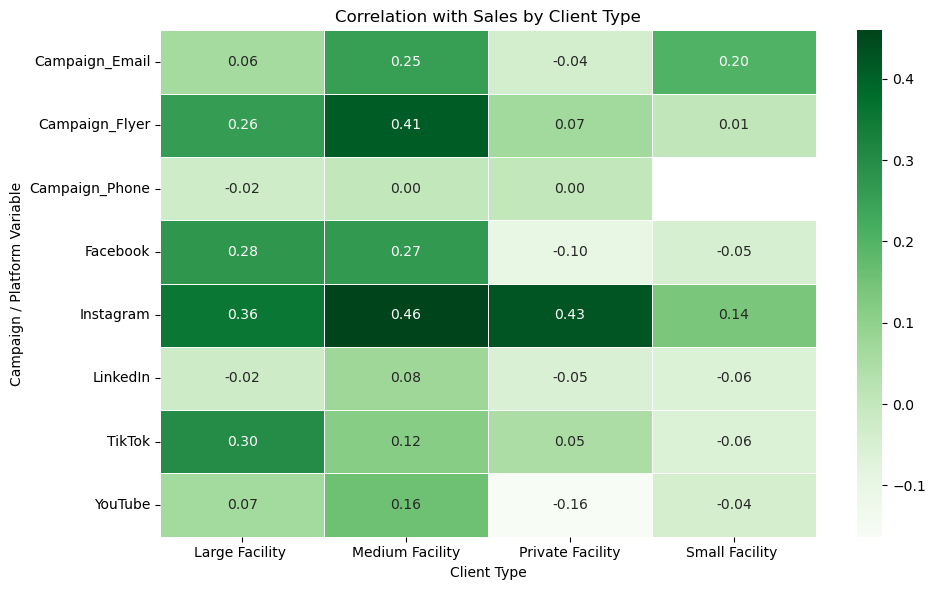

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare correlation matrix again (if not already done)
correlation_analysis = pd.DataFrame(
    df_cleaned.groupby('Client_Type')[[
        'Amount_Collected',
        'Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone',
        'Facebook', 'Instagram', 'YouTube', 'TikTok', 'LinkedIn'
    ]].corr()['Amount_Collected']
).reset_index()

# Filter out self-correlation
correlation_analysis = correlation_analysis[
    correlation_analysis['level_1'] != 'Amount_Collected'
]

# Rename columns for clarity
correlation_analysis.columns = ['Client_Type', 'Variable', 'Correlation']

# Pivot for heatmap
heatmap_data = correlation_analysis.pivot(index='Variable', columns='Client_Type', values='Correlation')

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title("Correlation with Sales by Client Type")
plt.xlabel("Client Type")
plt.ylabel("Campaign / Platform Variable")
plt.tight_layout()
plt.savefig("Figures/segmented_correlation_heatmap.png")
plt.show()


# Regression Analysis

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
import pandas as pd

# Clean column names
df_cleaned.columns = (
    df_cleaned.columns.str.replace(" ", "_")
                        .str.replace("(", "")
                        .str.replace(")", "")
)

# Define variables
campaign_vars = ['Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone']
platform_vars = ['Facebook', 'Instagram', 'YouTube', 'TikTok', 'LinkedIn']
all_vars = campaign_vars + platform_vars

# Create all pairwise interaction terms
interaction_terms = [f"{a}:{b}" for a, b in combinations(all_vars, 2)]

# Build formula
formula = 'Amount_Collected ~ ' + ' + '.join(all_vars + interaction_terms)

# Fit the model
results = smf.ols(formula=formula, data=df_cleaned.dropna()).fit()

# Print full model summary
print(results.summary())

# Optional: Filtered summary for only statistically significant variables
sig_mask = (results.pvalues < 0.05) & (results.pvalues.index != 'Intercept')
filtered_summary = pd.DataFrame({
    'Variable': results.params[sig_mask].index,
    'Coefficient (Impact)': results.params[sig_mask].values,
    'P-Value': results.pvalues[sig_mask].values
}).sort_values('Coefficient (Impact)', ascending=False)

print("\nFiltered summary (p < 0.05):")
print(filtered_summary)
with open("Outputs/pooled_model_ols_summary.txt", "w") as f:
    f.write(results.summary().as_text())




                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     33.73
Date:                Thu, 22 May 2025   Prob (F-statistic):          1.16e-165
Time:                        16:26:17   Log-Likelihood:                -28588.
No. Observations:                1545   AIC:                         5.725e+04
Df Residuals:                    1508   BIC:                         5.745e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [29]:
# Extract key OLS summary stats
summary_stats = {
    "R-squared": results.rsquared,
    "Adj. R-squared": results.rsquared_adj,
    "F-statistic": results.fvalue,
    "Prob (F-statistic)": results.f_pvalue,
    "No. Observations": int(results.nobs),
    "AIC": results.aic,
    "BIC": results.bic
}

# Save to CSV (or JSON if you prefer)
pd.DataFrame.from_dict(summary_stats, orient='index', columns=["Value"]).to_csv("Outputs/pooled_model_stats.csv")


In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from itertools import combinations

consolidated_summary = pd.DataFrame()

# Define regressors
campaign_vars = ['Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone']
platform_vars = ['Facebook', 'Instagram', 'YouTube', 'TikTok', 'LinkedIn']
all_vars = campaign_vars + platform_vars
interaction_terms = [f"{a}:{b}" for a, b in combinations(all_vars, 2)]

# Build full regression formula
formula = 'Amount_Collected ~ ' + ' + '.join(all_vars + interaction_terms)

# Loop over client types
for acctype in df_cleaned['Client_Type'].unique():
    print(acctype)
    temp_data = df_cleaned[df_cleaned['Client_Type'] == acctype].dropna().copy()

    # Run OLS model
    try:
        results = smf.ols(formula=formula, data=temp_data).fit()

        # Extract significant variables
        coef_series = results.params
        pval_series = results.pvalues
        sig_mask = (pval_series < 0.05) & (coef_series.index != 'Intercept')
        sig_vars = coef_series[sig_mask]

        if sig_vars.empty:
            print("No significant predictors.")
            continue

        df = pd.DataFrame({
            'Variable': sig_vars.index,
            'Coefficient (Impact)': sig_vars.values
        })
        df['Account Type'] = acctype
        df = df.sort_values('Coefficient (Impact)', ascending=False)

        consolidated_summary = pd.concat([consolidated_summary, df], ignore_index=True)

        print(results.summary())

    except Exception as e:
        print(f"Regression failed for {acctype}: {e}")


Medium Facility
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     8.998
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.47e-31
Time:                        12:16:32   Log-Likelihood:                -7770.4
No. Observations:                 414   AIC:                         1.561e+04
Df Residuals:                     379   BIC:                         1.575e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------